# Slides
Click **[here](https://docs.google.com/presentation/d/1EE8kNN6rFtGPurpuF81m-EmkaTBGL2CZ2GQi9BuoNDQ/edit?usp=sharing)** to download the Slides.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Dependencies

In [ ]:

import numpy as np
import torch
from torchvision.io import read_image
import time
import matplotlib.pyplot as plt
import matplotlib.image as imag



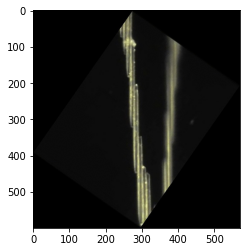

In [ ]:
img_path = '/content/drive/MyDrive/frame_1406.jpg'
img=imag.imread(img_path)

img =torch.tensor(img)
plt.imshow(img[:,:,:3])

# Initialize membership Matrix

In [ ]:
k=2                          # no. of clusters

member = torch.tensor(np.random.dirichlet(np.ones(k),size=img.shape[:2]))

centers = torch.zeros((member.shape[-1],img.shape[-1]))

for i in range(centers.shape[0]):
  center = torch.reshape(centers[i],(1,1,centers.shape[1]))
  dist = ((img - center)**2).sum(axis=-1)

# Define Algorithm

In [ ]:
def compute_centroid(member, x):
  centers = torch.zeros((member.shape[-1],x.shape[-1]))
  member_sqr = np.square(member)
  membr_sqr_sum = member_sqr.sum(axis=1).sum(axis=0)
  for i in range(member.shape[-1]):
    for j in range(x.shape[-1]):
      centers[i,j] =(torch.sum(member_sqr[:,:,i]* x[:,:,j]))/ membr_sqr_sum[i]
  return centers


def update_member(x, centers, member):
  dist_mat = torch.zeros(member.shape)
  for i in range(centers.shape[0]):
    center = torch.reshape(centers[i],(1,1,centers.shape[1]))
    dist_mat[:,:,i] = ((img - center)**2).sum(axis=-1)

  for i in range(centers.shape[0]):
    member[:,:,i] = dist_mat[:,:,i]/(dist_mat[:,:,:]).sum(axis=-1)

  return member
 

def FCM(img, member, iter):
  for temp in range(iter):
    centers = compute_centroid(member, img)
    member = update_member(img, centers, member)
    print(temp)
  return member, centers
  

In [ ]:
startTime = time.time()
member,centers = FCM(img, member=member, iter=20)  
endTime = time.time()
print("exection time :" +str(endTime-startTime))

0
1
2
3
4
5
6
7
8
9
exection time :0.5067474842071533


# Visulize Results

You should change the cluster value accordingly as they are initializing randomly.

ie.

```
cluster = 1
```



<bound method Figure.show of <Figure size 1440x1440 with 4 Axes>>

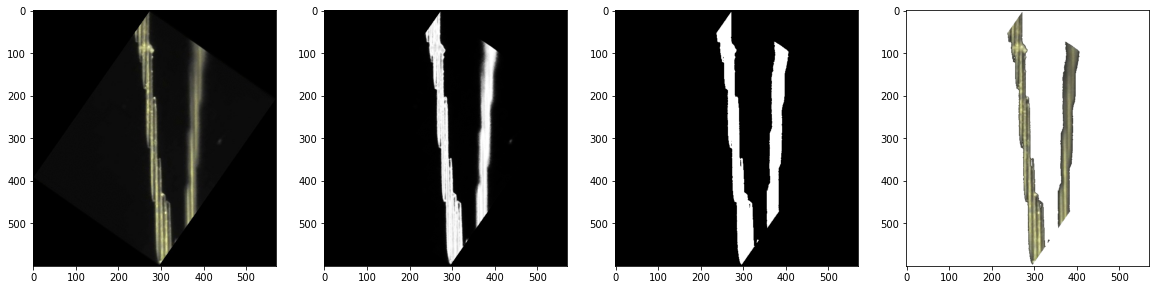

In [ ]:
cluster = 0   # cluster number which is to be visualize

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(img)
ax[1].imshow(255-255*member[:,:,cluster], cmap='gray')

temp = torch.where(member[:,:,cluster]>0.7,0,255)
ax[2].imshow(temp,'gray')
temp = torch.reshape(temp, (temp.shape[0], temp.shape[1], 1))
mask = img*temp
mask = np.where(mask==0,255,img)
ax[3].imshow(mask)
fig.show

In [ ]:
member.device

device(type='cpu')